## Importation des librairies 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import pygame
import copy

pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
# Idée : Propagation du feu dans une forêt
# 0 = Terre
# 1 = Arbre
# 2 = Feu
# 3 = Mort

## Corps :

### Initialiser une forêt de taille n :

In [5]:
def create_database(x,y,p):
    return np.random.choice([0,1],size=(x,y),p=[1-p,p]) #Créer une liste de liste de 1 et 0

### Afficher une forêt :

In [6]:
def draw(screen,data):
    x=0 #Initialise le point de départ en haut à gauche
    y=0
    unit=500/len(data) #Initialise le pas entre chaque case
    for i in range(len(data)): #Pour chaque ligne
        for j in range(len(data[0])): #Pour chaque colonne
            if(data[i][j]==1): #Si la case est un arbre
                pygame.draw.rect(screen,(71, 252, 80), pygame.Rect(x, y, x+unit, y+unit)) #Afficher une case verte
                x+=unit
            if(data[i][j]==0): #Si la case est de la terre
                pygame.draw.rect(screen,(247, 213, 143), pygame.Rect(x, y, x+unit, y+unit)) #Afficher une case grise
                x+=unit  
            if(data[i][j]==2): #Si la case est un arbre en feu
                pygame.draw.rect(screen,(255, 64, 67), pygame.Rect(x, y, x+unit, y+unit)) #Afficher une case rouge
                x+=unit
            if(data[i][j]==3): #Si la case est un arbre brulé
                pygame.draw.rect(screen,(33, 13, 4), pygame.Rect(x, y, x+unit, y+unit)) #Afficher une case noire
                x+=unit
        y+=unit
        x=0

    pygame.display.flip() #Mettre-à-jour la fenêtre

In [7]:
def vent_(n: list, data: list, force: float, alea: int, depart: tuple, graphique: bool):
    """
    
    0 < force < 1
    0 < alea < 1
    0 < force + alea < 1
    
    """
    if graphique: #Si on souhaite créer une animation
        pygame.init() #Initialiser une fenêtre
        screen = pygame.display.set_mode((500, 500)) #Fenêtre de taille 500x500
        screen.fill("white") #Fenêtre d'arrière-plan blanc
        pygame.display.set_caption("Propagation d'un feu de forêt") #Fenêtre de titre "Propagation d'un feu de forêt"
    
    graphe = [[],[]] 
    ensemble0 = set() #Les coordonnées de la terre
    ensemble1 = set() #Les coordonnées des arbres
    ensemble2 = {(depart[0],depart[1])} #Coordonnées des arbres en feu
    ensemble3 = set() #Coordonnées des arbres brulés
    data[depart[0]][depart[1]] = 2 #Initialiser le point de coordonnées (x,y) comme étant un arbre en feu
    for i in range(n): #De 0 à n-1
        for j in range(n): #De 0 à n-1
            if data[i][j] == 1: #Si c'est un arbre
                ensemble1 = ensemble1 | {(i,j)} #Ajouter les coordonnées de l'arbre à ensemble1
            if data[i][j] == 0: #Si c'est de la terre
                ensemble0 = ensemble0 | {(i,j)} #Ajouter les coordonnées de la terre
    
    while ensemble2 != set(): #Tant qu'il reste des arbres en feu
        if graphique: #Si on veut créer une animation
            for event in pygame.event.get(): #BOUTON "FERMER"
                if event.type == pygame.QUIT: #Si on clique sur FERMER
                   pygame.quit() #Quitter la fenêtre
            draw(screen,data) #Dessiner la forêt en fonction de data
            plt.pause(0.1) #Faire une pause
            display.clear_output(wait=True) #Actualiser la fenêtre
        temp = set() 
        for element in ensemble2: #Pour chaque arbre en feu
            x,y = element[0],element[1] 
            if (x+1,y) in ensemble1: #Si l'élément en bas est un arbre
                if np.random.binomial(1,alea + force): #Avec une probabilité de alea+force
                    data[x+1][y] = 2 #Bruler l'arbre en bas
                    temp = temp | {(x+1,y)} 
            if (x+1,y+1) in ensemble1: #Si l'élément en bas à droite est un arbre
                 if np.random.binomial(1,alea + force/2): #Avec une probabilité de alea+force/2
                    data[x+1][y+1] = 2 #Bruler l'arbre en bas à droite
                    temp = temp | {(x+1,y+1)}
            if (x+1,y-1) in ensemble1: #Si l'élément en bas à gauche est un arbre
                if np.random.binomial(1,alea + force/2): #Avec une probabilité de alea+force/2
                    data[x+1][y-1] = 2 #Bruler l'arbre
                    temp = temp | {(x+1,y-1)}
            # les 3 prochaines conditions sont les sauts de cases
            if (x+2,y) in ensemble1: # si le deuxième élément en bas est un arbre
                if np.random.binomial(1,alea + force/4):
                    data[x+2][y] = 2
                    temp = temp | {(x+2,y)}
            if (x+2,y-1) in ensemble1:
                if np.random.binomial(1,alea + force/8): # si l'élément à gauche du deuxième élément en bas est un arbre
                    data[x+2][y-1] = 2
                    temp = temp | {(x+2,y-1)}
            if (x+2,y+1) in ensemble1: # si l'élément à gauche du deuxième élément en bas est un arbre
                if np.random.binomial(1,alea +force/8):
                    data[x+2][y+1] = 2
                    temp = temp | {(x+2,y+1)}
            if (x,y+1) in ensemble1: #Si l'élément en haut est un arbre
                 if np.random.binomial(1,alea): #Avec une probabilité de alea
                    data[x][y+1] = 2 #Bruler l'arbre du haut
                    temp = temp | {(x,y+1)}
            if (x,y-1) in ensemble1: #Si l'élément à gauche est un arbre
                if np.random.binomial(1,alea): #Avec une probabilité de alea
                    data[x][y-1] = 2 #Bruler l'arbre à gauche
                    temp = temp | {(x,y-1)}
            if (x-1,y) in ensemble1: #Si l'élément en haut est un arbre
                if np.random.binomial(1,alea - force/4): #Avec une probabilité de alea-force/4
                    data[x-1][y] = 2 #Bruler l'arbre du haut
                    temp = temp | {(x-1,y)}
            if (x-1,y+1) in ensemble1: #Si l'élément en haut à droite est un arbre
                 if np.random.binomial(1,alea - force/8): #Avec une probabilité de alea-force/8
                    data[x-1][y-1] = 2 #Bruler l'arbre en haut à droite
                    temp = temp | {(x-1,y-1)}
            if (x-1,y-1) in ensemble1: #Si l'élément en haut à gauche est un arbre
                if np.random.binomial(1,alea - force/8): #Avec une probabilité de alea-force/8
                    data[x-1][y-1] = 2 #Bruler l'arbre en haut à gauche
                    temp = temp | {(x-1,y-1)}
            data[x][y] = 3 #Transformer chaque arbre en feu en arbre brulé
        ensemble1 = ensemble1 ^ temp  #Faire la différence symétrique des arbres et des nouveaux arbres en feu
        ensemble3 = ensemble3 | ensemble2 #Faire l'union des arbres brulés et des arbres en feu
        ensemble2 = temp #Remplacer par les nouveaux arbres en feu
        graphe[0].append(len(ensemble1)) #Ajouter le nombre d'arbre
        graphe[1].append(len(ensemble3)) #Ajouter le nombre d'arbre brulé
    if graphique:
        pygame.quit()
    return graphe

In [8]:
def calcul_humidite(taux):
    if 0 <= taux < 10: #Si le taux est compris entre 0 et 10
        return 0.06 * taux + 2.9 
    if 10 <= taux < 20: #Si le taux est compris entre 10 et 20
        return 0.03 * taux + 2.6
    if 20 <= taux < 30: #Si le taux est compris entre 20 et 30
        return 0.02 * taux + 2.3
    if 30 <= taux < 40: #Si le taux est compris entre 30 et 40
        return 0.01 * taux + 1.6
    if 40 <= taux < 60: #Si le taux est compris entre 40 et 60
        return 0.05 * taux + 1.9
    if 60 <= taux < 80: #Si le taux est compris entre 60 et 80
        return 0.1 * taux + 1.2
    if 80 <= taux <= 100: #Si le taux est compris entre 80 et 100
        return 0.2 * taux + 0.6 

In [24]:
def humidite_(n: list, data: list, alea: int, depart: tuple, graphique: bool, tx: float):
    """
    0 < tx < 1
    
    """

    if graphique: #Si on souhaite créer une animation
        pygame.init() #Initialiser une fenêtre
        screen = pygame.display.set_mode((500, 500)) #Fenêtre de taille 500x500
        screen.fill("white") #Fenêtre d'arrière-plan blanc
        pygame.display.set_caption("Propagation d'un feu de forêt") #Fenêtre de titre "Propagation d'un feu de forêt"
    
    graphe = [[],[]]
    ensemble0 = set() #Les coordonnées de la terre
    ensemble1 = set() #Les coordonnées des arbres
    ensemble2 = {(depart[0],depart[1],1)} #Les coordonnées des arbres en feu
    ensemble3 = set() #Les coordonnées des arbres brulés
    data[depart[0]][depart[1]] = 2 #Initialiser le point de coordonnées (x,y) comme étant un arbre en feu
    
    p = calcul_humidite(tx) #Donner la probabilité en fonction du taux d'humidité
    # p correspond au nombre d'etapes qu'un arbre prend à mourir loorsqu'il est en feu
    for i in range(n): #De 0 à n-1
        for j in range(n): #De 0 à n-1
            if data[i][j] == 1: #Si c'est un arbre
                ensemble1 = ensemble1 | {(i,j)}
            if data[i][j] == 0: #Si c'est de la terre
                ensemble0 = ensemble0 | {(i,j)}
    
    while ensemble2 != set():
        if graphique: #Si on souhaite créer une animation
            for event in pygame.event.get(): #BOUTON "FERMER"
                if event.type == pygame.QUIT: #Si on clique sur FERMER
                   pygame.quit() #Fermer la fenêtre
            draw(screen,data) #On dessine la forêt en fonction de data
            plt.pause(0.1) #Faire une pause
            display.clear_output(wait=True) #Actualiser la fenêtre
        temp = set()
        for element in ensemble2:
            x,y = element[0],element[1]
            if (x+1,y) in ensemble1:
                if np.random.binomial(1,alea):
                    data[x+1][y] = 2
                    temp = temp | {(x+1,y,1)}
                    ensemble1 = ensemble1 ^ {(x+1,y)}
            if (x+1,y+1) in ensemble1:
                 if np.random.binomial(1,alea/2):
                    data[x+1][y+1] = 2
                    temp = temp | {(x+1,y+1,1)}
                    ensemble1 = ensemble1 ^ {(x+1,y+1)}
            if (x+1,y-1) in ensemble1:
                if np.random.binomial(1,alea/2):
                    data[x+1][y-1] = 2
                    temp = temp | {(x+1,y-1,1)}
                    ensemble1 = ensemble1 ^ {(x+1,y-1)}
            if (x,y+1) in ensemble1:
                 if np.random.binomial(1,alea):
                    data[x][y+1] = 2
                    temp = temp | {(x,y+1,1)}
                    ensemble1 = ensemble1 ^ {(x,y+1)}
            if (x,y-1) in ensemble1:
                if np.random.binomial(1,alea):
                    data[x][y-1] = 2
                    temp = temp | {(x,y-1,1)}
                    ensemble1 = ensemble1 ^ {(x,y-1)}
            if (x-1,y) in ensemble1:
                if np.random.binomial(1,alea):
                    data[x-1][y] = 2
                    temp = temp | {(x-1,y,1)}
                    ensemble1 = ensemble1 ^ {(x-1,y)}
            if (x-1,y+1) in ensemble1:
                 if np.random.binomial(1,alea/2):
                    data[x-1][y+1] = 2
                    temp = temp | {(x-1,y+1,1)}
                    ensemble1 = ensemble1 ^ {(x-1,y+1)}
            if (x-1,y-1) in ensemble1:
                if np.random.binomial(1,alea/2):
                    data[x-1][y-1] = 2
                    temp = temp | {(x-1,y-1,1)}
                    ensemble1 = ensemble1 ^ {(x-1,y-1)}
            if element[2] >= p:
                ensemble3 = ensemble3 | {(x,y)}
                data[x][y] = 3
            else:
                temp = temp | {(x,y,element[2]+1)}
        ensemble2 = temp
        graphe[0].append(len(ensemble1))
        graphe[1].append(len(ensemble3))
    if graphique:
        pygame.quit()
    return graphe


In [10]:
def aff_graphe(n: int, data: list, vent: bool, humidite: bool, alea: float, animation: bool, depart: list, force: float, tx: float):
    if vent: #Si on veut le vent
        donnes = [None for _ in range(n)] #Créer une liste de None
        maxi = 0
        for i in range(n): #De 0 à n-1
            temp = copy.copy(data) #Copier la forêt
            sortie = vent_(len(temp),temp,force,alea,depart,animation) #Donner le nombre d'arbres et d'arbres brulés
            if len(sortie[0]) > maxi: maxi = len(sortie[0]) #Donner le plus grand nombre d'arbres 
            donnes[i] = sortie 
    if humidite: #Si on veut l'humidité
        donnes = [None for _ in range(n)] #Créer une liste de None
        maxi = 0
        for i in range(n): #De 0 à n-1
            temp = copy.copy(data) #Copier la forêt
            sortie = humidite_(len(temp),temp,alea,depart,animation,tx) #Donner le nombre d'arbres et d'arbres brulés
            if len(sortie[0]) > maxi: maxi = len(sortie[0]) #Donner le plus grand nombre d'arbres 
            donnes[i] = sortie #Associer à la case i, la liste (nb_arbre,nb_arbre_brulé)
    moy = [[0 for _ in range(maxi)],[0 for _ in range(maxi)]] #Créer une liste de 2 listes comportant maxi 0
    for liste in donnes: #Pour chaque liste (nb_arbre,nb_arbre_brulé)
        i = 0
        while len(liste[0]) > i: #Tant que i est inférieur nombre d'arbre
            moy[0][i] += liste[0][i] #Ajouter le nombre d'arbre à la liste moy
            moy[1][i] += liste[1][i] #Ajouter le nombre d'arbre brulé à la liste moy
            i += 1
        x, y = liste[0][-1], liste[1][-1] #Récupérer le nombre d'arbres et d'arbres brulés de la dernière case
        for j in range(i,maxi): #De i à maxi
            moy[0][j] += x #Ajouter le nombre d'arbres de la dernière case
            moy[1][j] += y #Ajouter le nombre d'arbres brulés de la dernière case
    for k in range(maxi): #Pour chaque élément
        moy[0][k] /= n #Faire la moyenne des arbres
        moy[1][k] /= n #Faire la moyenne des arbres brulés
    fig, ax = plt.subplots()
    ax.plot([i for i in range(maxi)],moy[0],label="Nombre d'arbres restants") #Créer un graphique des arbres
    ax.plot([i for i in range(maxi)],moy[1],label="Nombre d'arbres brulés") #Créer un graphique des arbres brulés
    leg = ax.legend();

In [11]:
def main():
    print("Bienvenue sur notre modélisation de feu de forêt")
    n = int(input("Veuillez entrer la longueur du côté de la forêt"))
    d = float(input("Veuillez entrer la densité de la forêt(entier entre 0 et 1)"))
    choix = int(input("Ecrivez 1 si vous voulez avec le vent et 0 si vous voulez simuler avec l'humidité"))
    if choix:
        f = float(input("Ecrivez la force du vent (entre 0 et 1)"))
        alea = float(input("Ecrivez la probabilité aléatoire (entre 0 et 1)"))
        nb = int(input("Ecrivez le nombre de simulations que vous voulez effectuer"))
        if nb == 1: animation = int(input("Ecrivez 1 si vous voulez voir notre simulation avec pygame sinon 0"))
        else: animation = 0
        x = int(input("Ecrivez la ligne du point de depart"))
        y = int(input("Ecrivez la colonne du point de depart"))
        data = create_database(n,n,d)
        aff_graphe(nb,data,True,False,alea,bool(animation),[x,y],f,0)
    else:
        alea = float(input("Ecrivez la probabilité aléatoire (entre 0 et 1)"))
        tx = float(input("Ecrivez l'humidite en %"))
        nb = int(input("Ecrivez le nombre de simulations que vous voulez effectuer"))
        if nb == 1: animation = int(input("Ecrivez 1 si vous voulez voir notre simulation avec pygame sinon 0"))
        else: animation = 0
        x = int(input("Ecrivez la ligne du point de depart"))
        y = int(input("Ecrivez la colonne du point de depart"))
        data = create_database(n,n,d)
        aff_graphe(nb,data,False,True,alea,bool(animation),[x,y],0,tx)
    return None
            

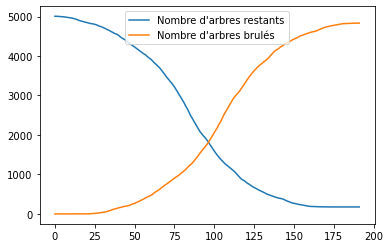

In [23]:
main()